# Virgo: exploratory data analysis

starting

## Libraries

In [45]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()

import plotly.express as px
import plotly.offline as pyo

In [110]:
import datetime
from dateutil.relativedelta import relativedelta

## Transfomations

visualising stock data

In [258]:
def viz_data(stock_code, n_days, window, lags):
    today = datetime.date.today()
    begin_date = today - relativedelta(days = n_days)
    begin_date_str = begin_date.strftime('%Y-%m-%d')
    
    stock = yf.Ticker(stock_code)
    df = stock.history(period="max")
    df = df.sort_values('Date')
    df.reset_index(inplace=True)
    
    ### getting rolling mean
    df["Close_roll_mean"] = (
        df.sort_values("Date")["Close"]
        .transform(lambda x: x.rolling(window, min_periods=1).mean())
    )
    
    ### getting rolling stdv
    df["Close_roll_std"] = (
        df.sort_values("Date")["Close"]
        .transform(lambda x: x.rolling(window, min_periods=1).std())
    )
    df["upper"] = df['Close_roll_mean'] + df["Close_roll_std"]*2
    df["lower"] = df['Close_roll_mean'] - df["Close_roll_std"]*2
    
    ### differencial analysis
    df['lag'] = df.Close.shift(lags)
    df['Dif'] = np.log(df['Close']) - np.log(df['lag'])
    df['Pos'] = np.where(df['Dif'] >= 0,df['Dif'], np.nan )
    df['Neg'] = np.where(df['Dif'] < 0,df['Dif'], np.nan )
    
    df = df[df.Date >= begin_date_str ]
    
    a4_dims = (15.0, 14.0)
    fig, axes = plt.subplots(2,1,figsize=a4_dims)
    
    sns.lineplot(data=df, x="Date", y="Close", color = 'Blue', ax=axes[0]).set(title=f'stock: {stock_code} roll window analysis: {window} days', label = 'Stock price')
    sns.lineplot(data=df, x="Date", y="Close_roll_mean", color = 'black', alpha = 0.3, ax=axes[0] )
    sns.lineplot(data=df, x="Date", y="lower" , color = 'red', alpha = 0.4, ax=axes[0] )
    sns.lineplot(data=df, x="Date", y="upper", color = 'red', alpha = 0.4, ax=axes[0] )
    axes[0].legend(labels=['Stock price', 'rolling mean', 'bounds'])
    
    sns.barplot(data=df, x="Date", y="Pos", color = 'blue', ax=axes[1]).set(title=f'stock: {stock_code} differencial: {lags} lags', label = 'Stock price')
    sns.barplot(data=df, x="Date", y="Neg", color = 'red', ax=axes[1])
    xticks = axes[1].get_xticks()
    dates_vector = df['Date'].dt.strftime('%Y-%m-%d').values
    xticklabels = [x if i%1000000 == 0 else '' for i,x in enumerate(dates_vector)]

    _ = axes[1].set_xticklabels(xticklabels)

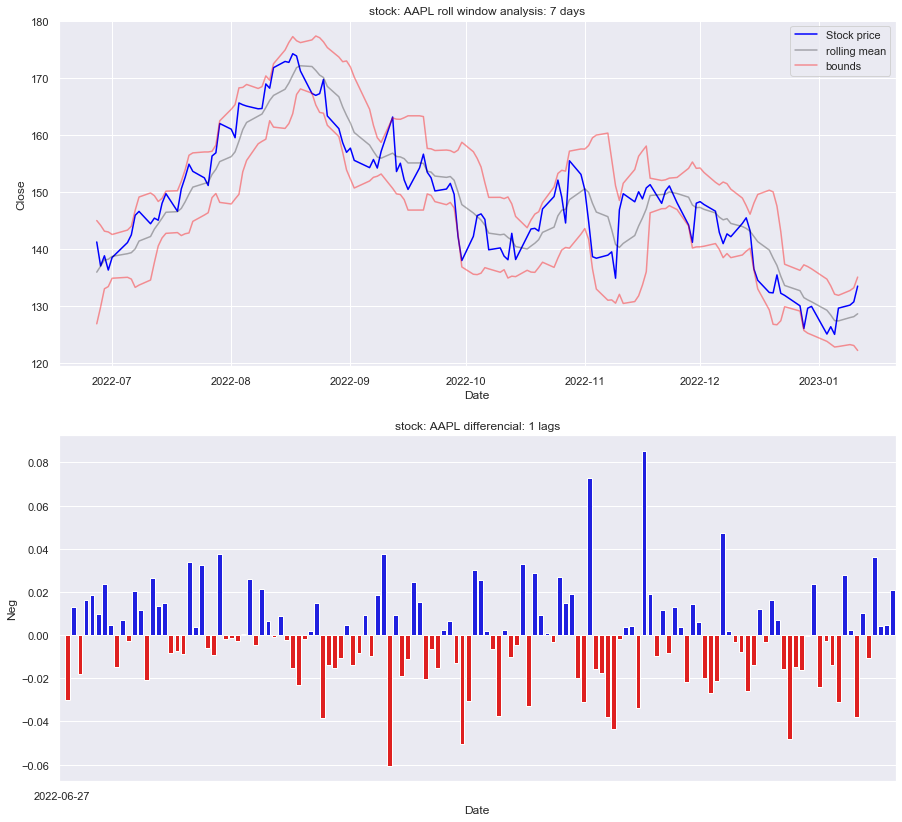

In [259]:
viz_data(stock_code = "AAPL", n_days = 200, window = 7, lags = 1)

In [ ]:
continues